In [1]:
import numpy as np
import os
import PIL
import cv2 as cv
import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

In [3]:
data_dir

'.\\datasets\\flower_photos'

In [4]:
import pathlib

data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [5]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [6]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

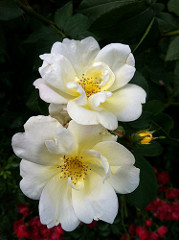

In [7]:
PIL.Image.open(str(roses[0]))

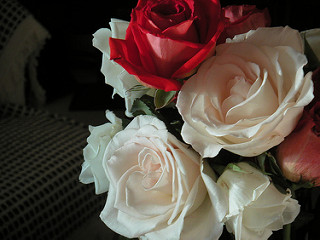

In [8]:
PIL.Image.open(str(roses[1]))

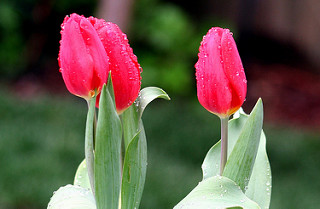

In [9]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

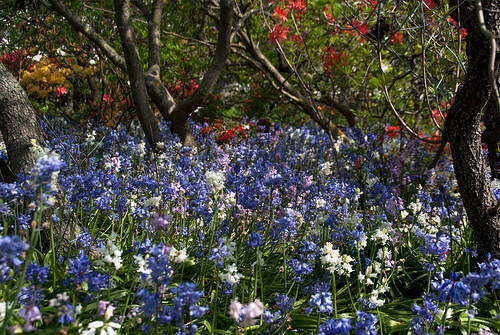

In [10]:
PIL.Image.open(str(tulips[1]))

In [11]:
flowers_image_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [12]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [13]:
str(flowers_image_dict['roses'][0])

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [14]:
img = cv.imread(str(flowers_image_dict['roses'][0]))
img.shape

(240, 179, 3)

In [15]:
cv.resize(img, (180,180)).shape

(180, 180, 3)

In [16]:
x,y = [] , []
for flower_name, images in flowers_image_dict.items():
    for image in images:
        img = cv.imread(str(image))
        resized_img = cv.resize(img, (180,180))
        x.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [17]:
x[0]

array([[[ 1, 16,  7],
        [ 1, 16,  7],
        [ 1, 17,  9],
        ...,
        [23, 50, 31],
        [25, 51, 32],
        [26, 52, 33]],

       [[10, 23, 15],
        [10, 23, 15],
        [ 9, 22, 14],
        ...,
        [20, 44, 30],
        [23, 47, 33],
        [26, 50, 36]],

       [[13, 20, 13],
        [12, 20, 13],
        [11, 19, 12],
        ...,
        [21, 43, 30],
        [22, 45, 31],
        [25, 48, 34]],

       ...,

       [[12, 24, 18],
        [11, 22, 15],
        [12, 21, 11],
        ...,
        [ 7, 14,  7],
        [ 2,  8,  2],
        [ 0,  2,  0]],

       [[19, 30, 28],
        [16, 26, 21],
        [14, 22, 15],
        ...,
        [ 3, 12,  2],
        [ 0,  8,  1],
        [ 0,  6,  1]],

       [[11, 21, 20],
        [17, 25, 24],
        [21, 28, 23],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 10,  4]]], dtype=uint8)

In [18]:
X = np.array(x)
Y = np.array(y)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, random_state=2)

In [20]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [21]:
X_train_scaled.shape[1:]

(180, 180, 3)

<h3 style='color:purple'>Build Convolutional Neural Network</h3>

In [22]:
num_Classes = 5


model = Sequential([
    layers.Conv2D(16, 3, padding = 'same', activation = 'relu', input_shape = X_train_scaled.shape[1:]),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    
    layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    
    layers.Conv2D(64,3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(num_Classes, activation=tf.nn.softmax)
    
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 22, 22, 64)       0

In [23]:
model.compile(optimizer = 'adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy']
             )

model.fit(X_train_scaled, y_train, epochs=10,validation_split=0.2)              

Epoch 1/10
69/69 [==============================] - 42s 568ms/step - loss: 1.4922 - accuracy: 0.3966 - val_loss: 1.3691 - val_accuracy: 0.5644
Epoch 2/10
69/69 [==============================] - 33s 471ms/step - loss: 1.3542 - accuracy: 0.5425 - val_loss: 1.3534 - val_accuracy: 0.5390
Epoch 3/10
69/69 [==============================] - 31s 448ms/step - loss: 1.2665 - accuracy: 0.6352 - val_loss: 1.3453 - val_accuracy: 0.5535
Epoch 4/10
69/69 [==============================] - 33s 486ms/step - loss: 1.2218 - accuracy: 0.6847 - val_loss: 1.2576 - val_accuracy: 0.6425
Epoch 5/10
69/69 [==============================] - 32s 466ms/step - loss: 1.1750 - accuracy: 0.7319 - val_loss: 1.2806 - val_accuracy: 0.6189
Epoch 6/10
69/69 [==============================] - 33s 474ms/step - loss: 1.1344 - accuracy: 0.7769 - val_loss: 1.2678 - val_accuracy: 0.6243
Epoch 7/10
69/69 [==============================] - 34s 491ms/step - loss: 1.1078 - accuracy: 0.8015 - val_loss: 1.2767 - val_accuracy: 0.6171

In [24]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 5s 157ms/step - loss: 1.2752 - accuracy: 0.6264


[1.2751659154891968, 0.6263616681098938]

In [25]:
predictions = model.predict(X_test_scaled)
label = [np.argmax(x) for x in predictions]
label[:10]

29/29 [==============================] - 4s 144ms/step


[2, 0, 0, 2, 3, 0, 4, 4, 4, 0]

In [26]:
y_test[:10]

array([2, 4, 4, 0, 0, 0, 0, 4, 0, 0])

<h3 style='color:purple'>Improve Test Accuracy Using Data Augmentation</h3>

In [27]:
X_train.shape[1:]

(180, 180, 3)

In [28]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape= X_train.shape[1:]),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.2),
  ]
)

**Check Images**

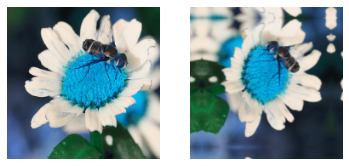

In [29]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.axis('off')
ax1.imshow(X_train[1])

ax2.axis('off')
ax2.imshow(data_augmentation(X_train)[1].numpy().astype('uint8'))
plt.show()

<h3 style='color:purple'>Train the model using data augmentation and a drop out layer</h3>

In [45]:
num_classes = 5

Model = Sequential([
    data_augmentation,
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])   

Model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 90, 90, 16)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                 

In [46]:
Model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
Model.fit(X_train_scaled, y_train, epochs=10,validation_split=0.2)              

Epoch 1/10
69/69 [==============================] - 36s 501ms/step - loss: 1.5370 - accuracy: 0.3385 - val_loss: 1.3463 - val_accuracy: 0.4465
Epoch 2/10
69/69 [==============================] - 35s 504ms/step - loss: 1.2463 - accuracy: 0.4625 - val_loss: 1.2562 - val_accuracy: 0.4682
Epoch 3/10
69/69 [==============================] - 35s 513ms/step - loss: 1.1700 - accuracy: 0.5007 - val_loss: 1.1628 - val_accuracy: 0.5172
Epoch 4/10
69/69 [==============================] - 37s 534ms/step - loss: 1.1187 - accuracy: 0.5466 - val_loss: 1.0635 - val_accuracy: 0.5862
Epoch 5/10
69/69 [==============================] - 34s 493ms/step - loss: 1.0330 - accuracy: 0.5734 - val_loss: 1.0012 - val_accuracy: 0.6316
Epoch 6/10
69/69 [==============================] - 34s 497ms/step - loss: 0.9751 - accuracy: 0.6234 - val_loss: 0.9971 - val_accuracy: 0.6098
Epoch 7/10
69/69 [==============================] - 36s 520ms/step - loss: 0.9604 - accuracy: 0.6156 - val_loss: 1.0018 - val_accuracy: 0.5989

In [33]:
Model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 4s 149ms/step - loss: 1.0750 - accuracy: 0.6264


[1.075018286705017, 0.6263616681098938]

In [39]:
print(y_test[:10])
predictions = Model.predict(X_test_scaled)
label = [np.argmax(x) for x in predictions]
label[:10]

[2 4 4 0 0 0 0 4 0 0]
29/29 [==============================] - 2s 80ms/step


[2, 4, 4, 4, 3, 0, 0, 4, 4, 3]

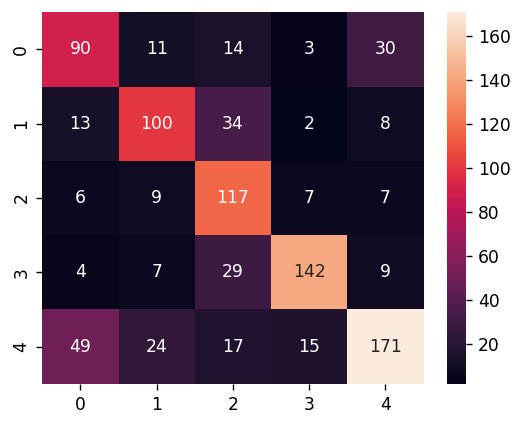

In [43]:
from sklearn.metrics import confusion_matrix , classification_report
plt.figure(figsize=(5,4), dpi = 123)
sns.heatmap(confusion_matrix(label,y_test), annot=True, fmt = 'd')
plt.show()

In [44]:
print("Classification Report: \n", classification_report(y_test, label))

Classification Report: 
               precision    recall  f1-score   support

           0       0.61      0.56      0.58       162
           1       0.64      0.66      0.65       151
           2       0.80      0.55      0.66       211
           3       0.74      0.84      0.79       169
           4       0.62      0.76      0.68       225

    accuracy                           0.68       918
   macro avg       0.68      0.67      0.67       918
weighted avg       0.68      0.68      0.67       918



In [2]:
66/1346 * 100

4.903417533432393